#Goodness of Fit on citibike data

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
s = json.load(open(os.getenv ('PUI2015')+"/plotformat.json"))
pl.rcParams.update(s)

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
dec = pd.read_csv('201412-citibike-tripdata.csv')
jan = pd.read_csv('201501-citibike-tripdata.csv')
feb = pd.read_csv('201502-citibike-tripdata.csv')
may = pd.read_csv('201505-citibike-tripdata.csv')
jun = pd.read_csv('201506-citibike-tripdata.csv')
jul = pd.read_csv('201507-citibike-tripdata.csv')

In [4]:
df_W = pd.concat([dec, jan, feb], keys = ['x','y','z'])
df_S = pd.concat([may, jun, jul], keys = ['x','y','z'])

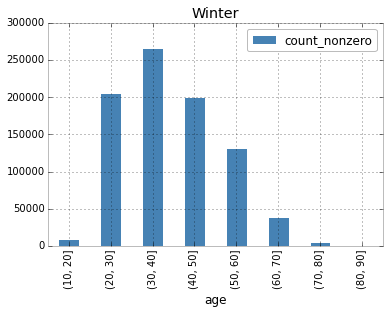

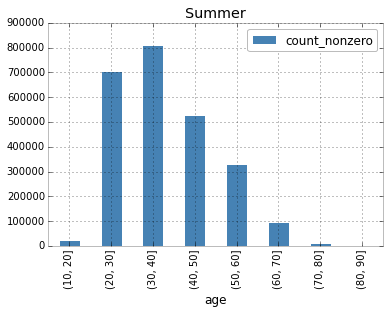

In [5]:
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

bins = np.arange(10, 99, 10)

df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])

df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

#GoF KS tests on Summer and Winter

In [6]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to cauchy 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, cauchy fit", ksW
print "summer, cauchy fit", ksS

#compare to poisson

ksW=scipy.stats.kstest(W_age_dist, 'poisson', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'poisson', args=(35,))
print "winter, poisson fit", ksW
print "summer, poisson fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, cauchy fit (0.99999880158020016, 0.0)
summer, cauchy fit (0.9999996082677356, 0.0)
winter, poisson fit (1.0, 0.0)
summer, poisson fit (1.0, 0.0)


The KS statistics results above show that the summer and winter distributions may not be best modelled by a gaussian distribution or a poisson distribution, the cauchy distribution is a slightly better model.

#GoF AD tests on Summer and Winter

In [7]:
ageW = np.array([a for a in df_W.age if not np.isnan(a)])
ageS = np.array([b for b in df_S.age if not np.isnan(b)])
new_ageS = np.random.choice(ageS, len(ageW), replace = False)
#compare to normal

adW=scipy.stats.anderson(ageW, dist = 'norm')
adS=scipy.stats.anderson(new_ageS, dist = 'norm')
print "winter, normal fit", adW
print "summer, normal fit", adS

#compare to logistic 

adW=scipy.stats.anderson(ageW, dist = 'logistic')
adS=scipy.stats.anderson(new_ageS, dist = 'logistic')
print "winter, logistic fit", adW
print "summer, logistic fit", adS

winter, normal fit (8415.0953397352714, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit (12307.738638145267, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
winter, logistic fit (8895.5756265121745, array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
summer, logistic fit (11635.104290753603, array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


The Anderson-Darling statistic is high for everything which shows that the winter and summer distributions cannot be modelled by either the normal distribution or the logistic distribution.

#Trying KL test for Summer and Winter

In [8]:
dist_n = np.random.randn(1000)

distpdf_n, mybins_n, = np.histogram(dist_n, density = True)
distpdf_W, mybins_W, = np.histogram(W_age_dist, density = True)
distpdf_S, mybins_S, = np.histogram(S_age_dist, density = True)

bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_W = mybins_W[:-1] + 0.5*(mybins_W[1] - mybins_W[0])
bincenters_S = mybins_S[:-1] + 0.5*(mybins_S[1] - mybins_S[0])

In [9]:
#compare to normal

klW=scipy.stats.entropy(distpdf_W, scipy.stats.norm.pdf(bincenters_n))
klS=scipy.stats.entropy(distpdf_S, scipy.stats.norm.pdf(bincenters_n))
print "winter, normal fit", klW
print "summer, normal fit", klS

winter, normal fit 2.62436582163
summer, normal fit 2.50163537598


The KL statistic is large which implies that we cannot use a gaussian distribution to model the summer or winter distributions.